In [ ]:
#Burada Yüz Tanıma Amaçlı Eğittiğimiz CNN Modelini Test Edeceğiz


In [ ]:
from google.colab import files

# .h5 dosyasını bilgisayarından seçip yükle
uploaded = files.upload()


Saving lfw-deepfunneled.zip to lfw-deepfunneled (1).zip


In [ ]:
from google.colab import files
uploaded = files.upload()  # .zip olarak yükle


Saving lfw_yuz_tanima_modeli.h5 to lfw_yuz_tanima_modeli.h5


In [ ]:
import zipfile
import os

zip_path = "/content/lfw-deepfunneled.zip"  #veri setini zipten çıkarma
extract_path = "/content/lfw-deepfunneled"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Veri seti çıkarıldı.")


Veri seti çıkarıldı.


In [ ]:

#klasörü olan kişilerin adlarını alabilmek için kopyalama
import shutil

kaynak_dizin="/content/lfw-deepfunneled/lfw-deepfunneled"
hedef_dizin="/content/filtered_face"

if not os.path.exists(hedef_dizin):
  os.makedirs(hedef_dizin)

filtrelenen_kisiler = []

for kisi in os.listdir(kaynak_dizin):
  kisi_klasor= os.path.join(kaynak_dizin,kisi)

  if os.path.isdir(kisi_klasor):
    resimler = os.listdir(kisi_klasor)

    if( len(resimler)>=15):
      filtrelenen_kisiler.append(kisi)
      shutil.copytree(kisi_klasor,os.path.join(hedef_dizin,kisi))


print(f"Yeni kişi sayısı /15+ görsele sahip: {len(filtrelenen_kisiler)}")
print("Örnek Kişiler",filtrelenen_kisiler[:5])



Yeni kişi sayısı /15+ görsele sahip: 96
Örnek Kişiler ['Jennifer_Lopez', 'Nancy_Pelosi', 'Pervez_Musharraf', 'Vladimir_Putin', 'Jennifer_Aniston']


In [ ]:
import os
print(os.listdir("/content"))



['.config', 'lfw-deepfunneled (1).zip', 'lfw-deepfunneled.zip', 'lfw_yuz_tanima_modeli.h5', 'lfw-deepfunneled', 'filtered_face', 'sample_data']


In [ ]:
#her kişinin bilgilerini ayırma

import os, shutil
from sklearn.model_selection import train_test_split

ana_dizin = "/content/filtered_face/lfw-deepfunneled"  # Gerçek kişi klasörlerinin olduğu dizin
hedef_dizin = "/content/data_split"
train_klasoru = os.path.join(hedef_dizin, "train")
test_klasoru = os.path.join(hedef_dizin, "test")

# Varsa temizleme
if os.path.exists(hedef_dizin):
    shutil.rmtree(hedef_dizin)

os.makedirs(train_klasoru)
os.makedirs(test_klasoru)

# Her kişi klasörü için işlem yapma
for kisi in os.listdir(ana_dizin):
    kisi_dizin = os.path.join(ana_dizin, kisi)
    if not os.path.isdir(kisi_dizin):
        continue

    resimler = os.listdir(kisi_dizin)
    if len(resimler) < 15:
        continue

    train_resimler, test_resimler = train_test_split(resimler, test_size=0.2, random_state=42)

    os.makedirs(os.path.join(train_klasoru, kisi))
    os.makedirs(os.path.join(test_klasoru, kisi))

    for resim in train_resimler:
        kaynak_yol = os.path.join(kisi_dizin, resim)
        hedef_yol = os.path.join(train_klasoru, kisi, resim)
        shutil.copy(kaynak_yol, hedef_yol)

    for resim in test_resimler:
        kaynak_yol = os.path.join(kisi_dizin, resim)
        hedef_yol = os.path.join(test_klasoru, kisi, resim)
        shutil.copy(kaynak_yol, hedef_yol)

print(" Eğitim ve test verisi başarıyla ayrıldı.")



✅ Eğitim ve test verisi başarıyla ayrıldı.


In [ ]:
print(os.listdir("/content/data_split/train")[:5])


['Jennifer_Lopez', 'Nancy_Pelosi', 'Pervez_Musharraf', 'Vladimir_Putin', 'Jennifer_Aniston']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
train_gen = datagen.flow_from_directory(
    "/content/data_split/train",
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Sınıf adlarını kontrol edelim
print(train_gen.class_indices)


Found 2839 images belonging to 96 classes.
{'Abdullah_Gul': 0, 'Alejandro_Toledo': 1, 'Alvaro_Uribe': 2, 'Amelie_Mauresmo': 3, 'Andre_Agassi': 4, 'Andy_Roddick': 5, 'Angelina_Jolie': 6, 'Ariel_Sharon': 7, 'Arnold_Schwarzenegger': 8, 'Atal_Bihari_Vajpayee': 9, 'Bill_Clinton': 10, 'Bill_Gates': 11, 'Bill_Simon': 12, 'Carlos_Menem': 13, 'Carlos_Moya': 14, 'Colin_Powell': 15, 'David_Beckham': 16, 'Dominique_de_Villepin': 17, 'Donald_Rumsfeld': 18, 'Fidel_Castro': 19, 'George_Robertson': 20, 'George_W_Bush': 21, 'Gerhard_Schroeder': 22, 'Gloria_Macapagal_Arroyo': 23, 'Gray_Davis': 24, 'Guillermo_Coria': 25, 'Halle_Berry': 26, 'Hamid_Karzai': 27, 'Hans_Blix': 28, 'Hu_Jintao': 29, 'Hugo_Chavez': 30, 'Igor_Ivanov': 31, 'Jack_Straw': 32, 'Jacques_Chirac': 33, 'Jean_Charest': 34, 'Jean_Chretien': 35, 'Jennifer_Aniston': 36, 'Jennifer_Capriati': 37, 'Jennifer_Lopez': 38, 'Jeremy_Greenstock': 39, 'Jiang_Zemin': 40, 'John_Ashcroft': 41, 'John_Bolton': 42, 'John_Howard': 43, 'John_Kerry': 44, 'John_

In [ ]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_gen.class_indices, f)


In [ ]:
from google.colab import files
files.download("class_indices.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Modeli test etme
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import json
import os

In [ ]:
# Modeli yükle
model = tf.keras.models.load_model("lfw_yuz_tanima_modeli.h5")

# class_indices'i yükle
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# id → etiket dönüşümü
class_labels = {v: k for k, v in class_indices.items()}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Gerçek kişi Abdullah_Gul
Tahmin edilen kişi: Abdullah_Gul


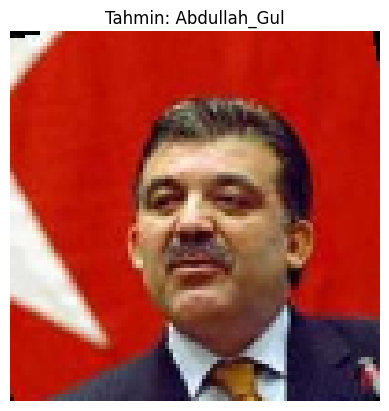

In [ ]:
#test Klasöründen Örnek Görsel Yükleyip Tahmin Etme
import matplotlib.pyplot as plt


ornek_kisi = "Abdullah_Gul"
ornek_gorsel=os.path.join("data_split/test",ornek_kisi,os.listdir(os.path.join("data_split/test",ornek_kisi))[0])


#Görselin yüklenmesi ve önişleme

img=image.load_img(ornek_gorsel, target_size=(100,100))

img_array= image.img_to_array(img)

img_array= img_array/255.0#normalizasyon
img_array = np.expand_dims(img_array,axis=0)


tahmin= model.predict(img_array)
tahmin_sinif=np.argmax(tahmin)

print("Gerçek kişi",ornek_kisi)
print("Tahmin edilen kişi:", class_labels[tahmin_sinif])


plt.imshow(img)
plt.title(f"Tahmin: {class_labels[tahmin_sinif]}")
plt.axis("off")
plt.show()
